Dataset created successfully. It shows a non-linear relationship.
Sample data points (X, y):
(0.09, 1.68)
(0.10, 1.23)
(0.20, 2.25)
(0.30, 2.01)
(0.36, 1.41)

Data split: 56 training samples, 24 testing samples.
Decision Tree model training complete.
Predictions made successfully.

Sample predictions:
  Actual: 0.37, Predicted: 1.04
  Actual: 1.68, Predicted: 1.23
  Actual: 2.30, Predicted: 1.83
  Actual: 0.40, Predicted: -0.01
  Actual: 1.36, Predicted: 1.83

Model Evaluation:
Mean Squared Error (MSE): 0.30
R-squared (R²): 0.90


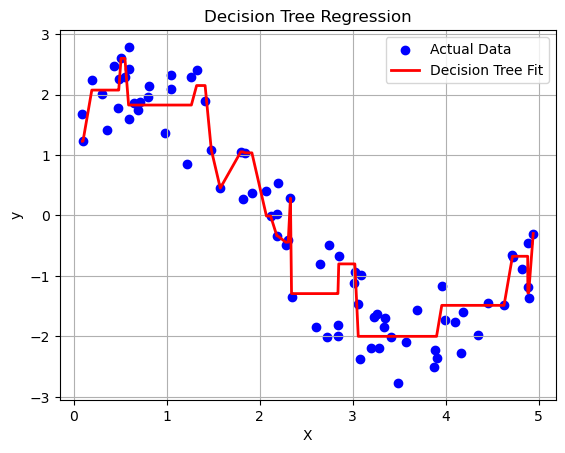


Visualization complete. The plot shows the original data and the step-like prediction curve from the Decision Tree.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a simulated non-linear dataset
# We'll simulate a relationship that is not a single line or curve.
np.random.seed(0)

# Independent variable (feature): X
X = np.sort(5 * np.random.rand(80, 1), axis=0)

# Dependent variable (target): y, with a non-linear relationship and noise
y = np.sin(X) + 2 * np.cos(X) + np.random.randn(80, 1) * 0.5

print("Dataset created successfully. It shows a non-linear relationship.")
print("Sample data points (X, y):")
for i in range(5):
    print(f"({X[i][0]:.2f}, {y[i][0]:.2f})")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# 3. Train the Decision Tree Regressor model
# We'll use a Decision Tree with a max depth to control its complexity.
# A deeper tree can model more complex relationships but may overfit.
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

print("Decision Tree model training complete.")

# 4. Make predictions on the testing data
y_pred = tree_model.predict(X_test)

print("Predictions made successfully.")
print("\nSample predictions:")
for i in range(min(5, len(y_test))):
    print(f"  Actual: {y_test[i][0]:.2f}, Predicted: {y_pred[i]:.2f}")

# 5. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 6. Visualize the results
# To plot the tree's prediction curve, we need to sort the data first.
X_sorted = np.sort(X.flatten())
X_sorted = X_sorted.reshape(-1, 1)

# Predict for the entire sorted range to see the full curve
y_pred_curve = tree_model.predict(X_sorted)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_pred_curve, color='red', linewidth=2, label='Decision Tree Fit')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualization complete. The plot shows the original data and the step-like prediction curve from the Decision Tree.")